# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import sys


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
cities_pd = pd.DataFrame()
cities_pd['City'] = cities
cities_pd['Lat'] = ""
cities_pd['Lng'] = ""
cities_pd['Max Temp'] = ""
cities_pd['Humidity'] = ""
cities_pd['Cloudiness'] = ""
cities_pd['Wind Speed'] = ""
cities_pd['Country'] = ""
cities_pd['Date'] = ""
cities_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,,,,,,,,
1,assiniboia,,,,,,,,
2,jamestown,,,,,,,,
3,tutoia,,,,,,,,
4,karratha,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info

city = [] 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness= []
wind_speed = []
country = []
date = []
count = 0

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key =  weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
print("----------------------------------------------------------")
print("Search started, please wait. ")
print("----------------------------------------------------------")

for city in cities:
    
    count 
    
    try:
    
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f'City number '+ str(count)+ ' is ' + city + ' has been proccesed completed' )
        
        #sys.stdout=open("Logs/successfull cities.txt","w")
        #print(f'City number '+ str(count)+ ' is ' + city + ' has been proccesed completed' )
        #sys.stdout.close()
        
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")
        #sys.stdout=open("/Logs/failed cities.txt","w")
        #print("City not found. Skipping...")
        #sys.stdout.close()
    
    count = count + 1
    time.sleep(2)     
print("----------------------------------------------------------")
print("Search completed successfully")
print("----------------------------------------------------------")

-----------------------------
Search started, please wait. 
-----------------------------
City number 0 is dikson has been proccesed completed
City number 1 is assiniboia has been proccesed completed
City number 2 is jamestown has been proccesed completed
City number 3 is tutoia has been proccesed completed
City number 4 is karratha has been proccesed completed
City number 5 is vaini has been proccesed completed
City number 6 is hofn has been proccesed completed
City number 7 is tucuman has been proccesed completed
City number 8 is nagato has been proccesed completed
City number 9 is east london has been proccesed completed
City number 10 is lebu has been proccesed completed
City number 11 is khani has been proccesed completed
City number 12 is ushuaia has been proccesed completed
City number 13 is saint-pierre has been proccesed completed
City number 14 is codrington has been proccesed completed
City number 15 is kaitangata has been proccesed completed
City number 16 is shetpe has bee

City number 147 is imeni poliny osipenko has been proccesed completed
City number 148 is botwood has been proccesed completed
City number 149 is tamiahua has been proccesed completed
City number 150 is beaverlodge has been proccesed completed
City number 151 is thinadhoo has been proccesed completed
City number 152 is sechura has been proccesed completed
City number 153 is mangawan has been proccesed completed
City number 154 is the valley has been proccesed completed
City number 155 is buraydah has been proccesed completed
City number 156 is langsa has been proccesed completed
City number 157 is purbalingga has been proccesed completed
City number 158 is hirara has been proccesed completed
City number 159 is vao has been proccesed completed
City not found. Skipping...
City not found. Skipping...
City number 162 is mkushi has been proccesed completed
City number 163 is tiznit has been proccesed completed
City number 164 is coquimbo has been proccesed completed
City number 165 is arraia

City number 298 is meulaboh has been proccesed completed
City number 299 is beloha has been proccesed completed
City number 300 is ponta delgada has been proccesed completed
City number 301 is bethel has been proccesed completed
City number 302 is guerrero negro has been proccesed completed
City number 303 is cidreira has been proccesed completed
City number 304 is bada has been proccesed completed
City number 305 is kuching has been proccesed completed
City number 306 is ancud has been proccesed completed
City number 307 is hunchun has been proccesed completed
City number 308 is zhigansk has been proccesed completed
City number 309 is fortuna has been proccesed completed
City number 310 is tilichiki has been proccesed completed
City number 311 is carmo do rio claro has been proccesed completed
City number 312 is leczyca has been proccesed completed
City number 313 is masvingo has been proccesed completed
City number 314 is dekar has been proccesed completed
City number 315 is san patr

City number 446 is dakar has been proccesed completed
City number 447 is laguna has been proccesed completed
City number 448 is duluth has been proccesed completed
City number 449 is siuna has been proccesed completed
City number 450 is kaniama has been proccesed completed
City number 451 is san ignacio has been proccesed completed
City number 452 is biltine has been proccesed completed
City number 453 is gladenbach has been proccesed completed
City number 454 is pitimbu has been proccesed completed
City number 455 is oeiras has been proccesed completed
City number 456 is kununurra has been proccesed completed
City number 457 is sao filipe has been proccesed completed
City number 458 is san rafael del sur has been proccesed completed
City number 459 is praia da vitoria has been proccesed completed
City not found. Skipping...
City not found. Skipping...
City number 462 is zhigalovo has been proccesed completed
City number 463 is campoverde has been proccesed completed
City number 464 is

City number 598 is turayf has been proccesed completed
City number 599 is gulu has been proccesed completed
City number 600 is ahar has been proccesed completed
City number 601 is shakiso has been proccesed completed
-----------------------------
Search completed successfully
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Visualize to confirm airport data appears
cities_dict = ({"City":cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

cities_dict_df = pd.DataFrame.from_dict(cities_dict, orient='index').transpose()
cities_dict_df.head()

# Save Data to csv
cities_dict_df.to_csv("output_data/WeatherPy.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_dict_df["Humidity"].max()

100

In [8]:
#  Get the indices of cities that have humidity over 100%.

hum_cities = cities_dict_df.loc[cities_dict_df['Humidity'] >= 100,:]
hum_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
90,ust-kan,-32.7167,152.15,14.44,100,40,2.74,AU,1619819161
99,sao francisco,6.1241,81.1185,24,100,20,0.51,LK,1619819352
103,yuzhno-yeniseyskiy,-9.4431,147.18,23,100,1,1.03,PG,1619819361
107,hambantota,-28.8667,153.567,17,100,90,3.09,AU,1619819371
149,tamiahua,-7.3881,109.364,11.11,100,100,0.7,ID,1619819476


In [9]:
print("No City over 100% Humidity")

No City over 100% Humidity


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_dict_df.loc[cities_dict_df["Humidity"] <= 100]
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,-14.93,97,86,4.32,RU,1619818936
1,assiniboia,49.6334,-105.984,25,14,100,9.77,CA,1619819102
2,jamestown,42.097,-79.2353,6.11,56,90,12.35,US,1619819105
3,tutoia,-2.7619,-42.2744,25.57,86,91,2.86,BR,1619819107
4,karratha,-20.7377,116.846,26.47,43,4,2.5,AU,1619819110


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

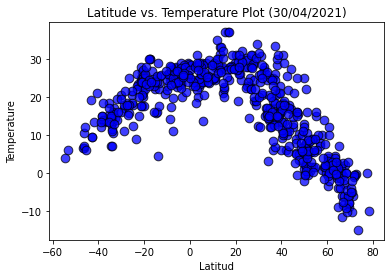

In [11]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'],s=75, color="blue",alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Temperature Plot (30/04/2021)")
plt.xlabel("Latitud")
plt.ylabel("Temperature")


plt.savefig("Images/Latitude vs. Temperature Plot 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

The closer to 0 (ecuator) the higher the temperature.
The far away from 0 (ecuator) the lower the temperature.

## Latitude vs. Humidity Plot

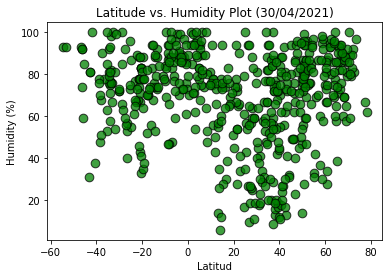

In [12]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],s=75, color="green",alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Humidity Plot (30/04/2021)")
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")


plt.savefig("Images/Latitude vs. Humidity Plot 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

There is no clear relationship but there seems to be more concentration of higher humidity closer to 0. 
Also, we can see more points as the latitud goes higher.

## Latitude vs. Cloudiness Plot

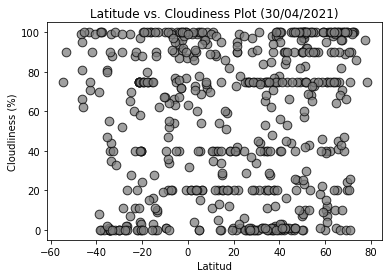

In [13]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],s=75, color="grey", alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Cloudiness Plot (30/04/2021)")
plt.xlabel("Latitud")
plt.ylabel("Cloudliness (%)")


plt.savefig("Images/Latitude vs. Cloudliness 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

There is no clear relationship. Also, we can see more points as the latitud goes higher.

## Latitude vs. Wind Speed Plot

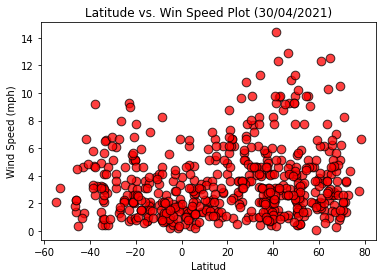

In [14]:
marker_size=15
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],s=75, color="red", alpha=0.75, edgecolors = "black")
plt.title("Latitude vs. Win Speed Plot (30/04/2021)")
plt.xlabel("Latitud")
plt.ylabel("Wind Speed (mph)")


plt.savefig("Images/Latitude vs. Wind Speed Plot 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

There is no clear relationship. We can see more points as the wind speed goes lower.

## Linear Regression

In [15]:
clean_city_data["Lat"] = cities_dict_df["Lat"].astype(float)
clean_city_data["Lng"] = cities_dict_df["Lng"].astype(float)
clean_city_data["Max Temp"] = cities_dict_df["Max Temp"].astype(float)
clean_city_data["Humidity"] = cities_dict_df["Humidity"].astype(float)
clean_city_data["Cloudiness"] = cities_dict_df["Cloudiness"].astype(float)
clean_city_data["Wind Speed"] = cities_dict_df["Wind Speed"].astype(float)

clean_city_data.dtypes

<ipython-input-15-75249bf0cfff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_city_data["Lat"] = cities_dict_df["Lat"].astype(float)
<ipython-input-15-75249bf0cfff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_city_data["Lng"] = cities_dict_df["Lng"].astype(float)
<ipython-input-15-75249bf0cfff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
northern_df = clean_city_data.loc[clean_city_data['Lat'] > 0,:]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,-14.93,97.0,86.0,4.32,RU,1619818936
1,assiniboia,49.6334,-105.9845,25.00,14.0,100.0,9.77,CA,1619819102
2,jamestown,42.0970,-79.2353,6.11,56.0,90.0,12.35,US,1619819105
6,hofn,64.2539,-15.2082,2.54,78.0,100.0,5.81,IS,1619818755
8,nagato,34.3833,131.2000,15.00,67.0,75.0,11.32,JP,1619819119


In [17]:
northern_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

The correlation between Latitude and Max Temp is -0.86
The r-squared is: 0.735023355007483


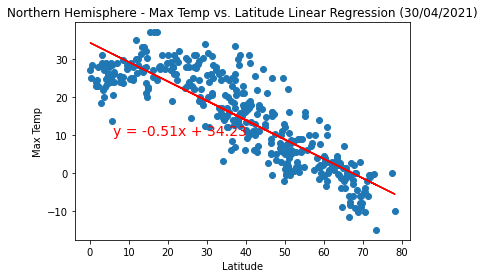

In [21]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Max Temp"])[0],2)
print(f"The correlation between Latitude and Max Temp is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:

The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
southern_df = clean_city_data.loc[clean_city_data['Lat'] < 0,:]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,tutoia,-2.7619,-42.2744,25.57,86.0,91.0,2.86,BR,1619819107
4,karratha,-20.7377,116.8463,26.47,43.0,4.0,2.50,AU,1619819110
5,vaini,-21.2000,-175.2000,25.00,88.0,75.0,5.14,TO,1619819036
7,tucuman,-26.8241,-65.2226,25.00,53.0,20.0,1.54,AR,1619819116
9,east london,-33.0153,27.9116,17.06,76.0,88.0,6.59,ZA,1619819005


The correlation between Latitude and Max Temp is 0.75
The r-squared is: 0.5622238087157423


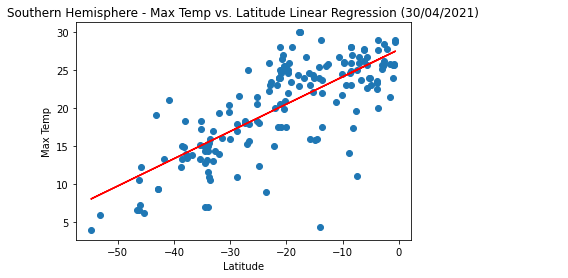

In [20]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Max Temp"])[0],2)
print(f"The correlation between Latitude and Max Temp is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes: 

The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity(%) is 0.13
The r-squared is: 0.016115840217329515


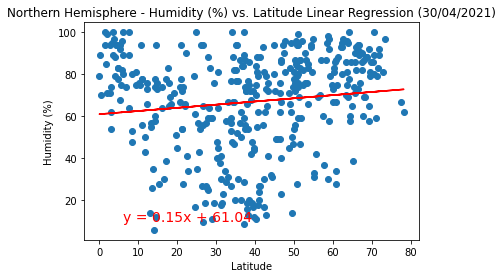

In [22]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Humidity"])[0],2)
print(f"The correlation between Latitude and Humidity(%) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:
    
Not a strong relationship. Humidity decrease as latitud approach to 0 (equator)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity(%) is 0.14
The r-squared is: 0.019631190297980352


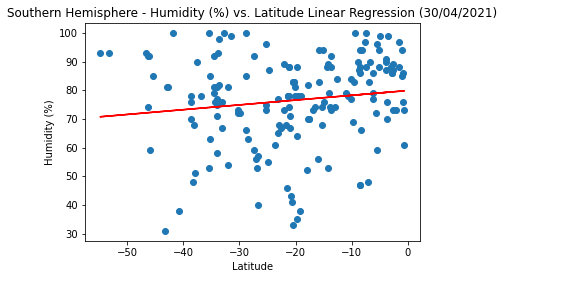

In [23]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Humidity"])[0],2)
print(f"The correlation between Latitude and Humidity(%) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:
    
A small humidity increase as latitud approach to 0 (equator)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness(%) is 0.15
The r-squared is: 0.021560032211223365


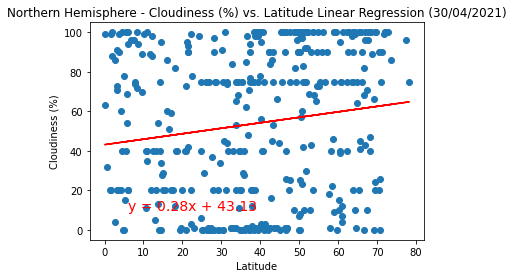

In [24]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Cloudiness"])[0],2)
print(f"The correlation between Latitude and Cloudiness(%) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:
    
There is no clear relationship.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness(%) is 0.15
The r-squared is: 0.023781052559379616


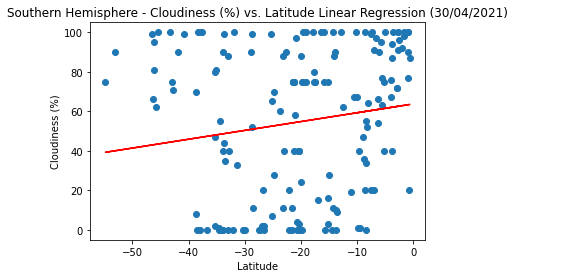

In [25]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Cloudiness"])[0],2)
print(f"The correlation between Latitude and Cloudiness(%) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes:
    
There is no clear relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed(mph) is 0.12
The r-squared is: 0.013594432049973581


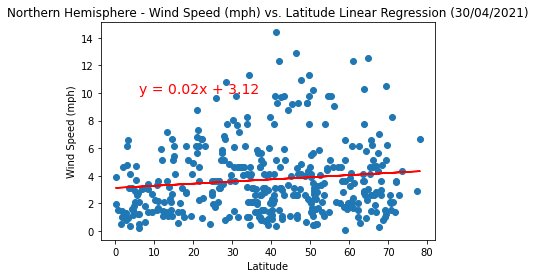

In [26]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Wind Speed"])[0],2)
print(f"The correlation between Latitude and Wind Speed(mph) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes: 

There is no clear relationship. We can see more points as the wind speed goes lower.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed(mph) is -0.22
The r-squared is: 0.04639885460071111


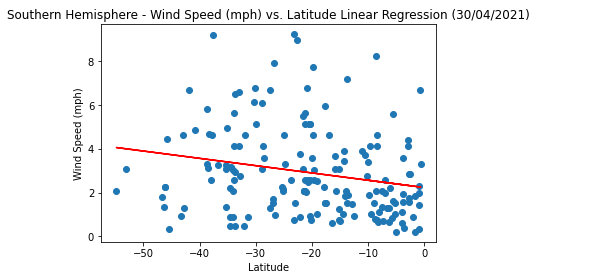

In [27]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Wind Speed"])[0],2)
print(f"The correlation between Latitude and Wind Speed(mph) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (30/04/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 30042021.png", bbox_inches = "tight")
plt.show()

Notes: 

There is no clear relationship. We can see more points as the wind speed goes lower.

# Final Analisys
----

#### Notes:
1. Dataframe created with relevant information for cities generated randomly such as Latitude, Longitude, Max Temperature, Humidity, Cloudiness, Wind Speed, Country, Date.


2. API calls to openweathermap.org to fullfill the lists created for items mentioned before.


3. New DataFrame equal to the city data to drop all humidity higher than 100 was created.


4. Latitude vs. Temperature Plot.

   The closer to 0 (equator) the higher the temperature.
   
   The far away from 0 (equator) the lower the temperature.


5. Latitude vs. Temperature Plot.

   There is no clear relationship but there seems to be more concentration of higher humidity closer to 0. 
   
   Also, we can see more points as the latitud goes higher.
   
   
6. Latitud vs. Wind Speed Plot

    There is no clear relationship. We can see more points as the wind speed goes lower.
    
    
7. Northern Hemisphere - Max Temp vs. Latitude Linear Regression

    The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.
    
    
8. Southern Hemisphere - Max Temp vs. Latitude Linear Regression

    The closer to 0 (equator) the higher the temperature. The far away from 0 (ecuator) the lower the temperature.


9. Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
    
    A small humidity decrease as latitud approach to 0 (equator).
    

10. Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

    A small humidity increase as latitud approach to 0 (equator).
    
    
11. Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

    There is no clear relationship.
    
    
12. Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

    There is no clear relationship.
    
    
13. Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

    There is no clear relationship. We can see more points as the wind speed goes lower.   
    
    
14. Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

    There is no clear relationship. We can see more points as the wind speed goes lower.   